# Assignment 2 - Question 2
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q2.ipynb`.

## 2.0 Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [30]:
import csv
import random
import numpy as np

In [31]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = [x[0] for x in all_molecules[:num_train]]
# each point in y_train has 1 value - the bandgap of the molecule
y_train = [x[1] for x in all_molecules[:num_train]]

x_test = [x[0] for x in all_molecules[num_train:]]
y_test = [x[1] for x in all_molecules[num_train:]]

### 2.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

2.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

To implement linear regression, I have used following steps:
* Defined a function, which can predict the output given input parameter and model(coefficient here). 
* For the cost, function I have normally used squared difference between hypothesis and ground truth results.
* I have started with null vector at starting point. 
* I have done 1000 iteration over the training set. 
* I have used stochastic gradient descent. So after every point, I am updating the paramaeters. 
* After going through a training point. I update the coefficients. 
* I have taken a extra parameter, to be treated as bias
* After all the ephocs, I will return model (coefficient of the eqaution) and the total error. 

<!-- your answer to 1.1.1 -->

2.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

2.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

* The best values of alpha comes out to be 0.01. Since number of training points are less, we can take lesser values of alpha and still the time will be less. 

In [32]:
# implement Linear Regression
from random import randrange
print("Number of training points: ",len(y_train))

def prediction(coefficient,inputVector):
    """Will predict the output given coefficent and vector"""
    predict=0
    for i in range(len(coefficient)):
        if i==0:
            predict+=coefficient[0]
        else:
            predict+=coefficient[i]*inputVector[i-1]
    
    return predict



# Linear regression using stochastic gradient descent

def linearReg(alpha,x_train,y_train,epoch):
    """ alpha is the learnign rate. Epoch is the number of times entire training data is parsed"""
    coefficient=[0 for i in range(len(x_train[0])+1)]
    # start with a random value

    for epochs in range(epoch):
        Totalerror=0
        for i in range(len(x_train)):       #for each data point
            predict=prediction(coefficient,x_train[i])
            error=(predict-y_train[i])      
            Totalerror+=error**2            # Square error
            
            # update the coefficient
            for j in range(len(x_train[i])+1):
                if j==0:
                    coefficient[0]-=alpha*error
                else:
                    coefficient[j]-=alpha*x_train[i][j-1]*error

        #print("Epoch: ",epochs, " Sum Error: ",Totalerror," Learning Rate: ", alpha)

    return coefficient,Totalerror


alpha=0.01
epoch=1000
bestLearningRate=alpha
leastError=float('inf')
bestCoordinate=[]
while alpha<0.1:
    coefficient,Totalerror=linearReg(alpha,x_train,y_train,epoch)
    print("Error in",int(alpha*100),"iteration: ",Totalerror)
    if Totalerror<leastError:
        leastError=Totalerror
        bestLearningRate=alpha
        bestCoordinate=coefficient
    alpha+=0.01

    
print("\nBest Learning Rate is: ",bestLearningRate," With Total Error: ",leastError)
print("Best Coefficient: ",coefficient)


y_pred=[]

for entry in x_test:
    y_pred.append(prediction(bestCoordinate,entry))


Number of training points:  87
Error in 1 iteration:  0.49722505553654756
Error in 2 iteration:  0.5057743930070934
Error in 3 iteration:  0.513204918481948
Error in 4 iteration:  0.519913258165878
Error in 5 iteration:  0.5262164176896804
Error in 6 iteration:  0.5323227594419991
Error in 7 iteration:  0.5383638607079492
Error in 8 iteration:  0.5444265809363583
Error in 9 iteration:  0.5505715144750465
Error in 10 iteration:  0.5568419804190452

Best Learning Rate is:  0.01  With Total Error:  0.49722505553654756
Best Coefficient:  [1.5792035421874069, -0.02769275845302008, -0.1147017137153846, 1.5347605752116404, 0.6519196408356728]


2.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

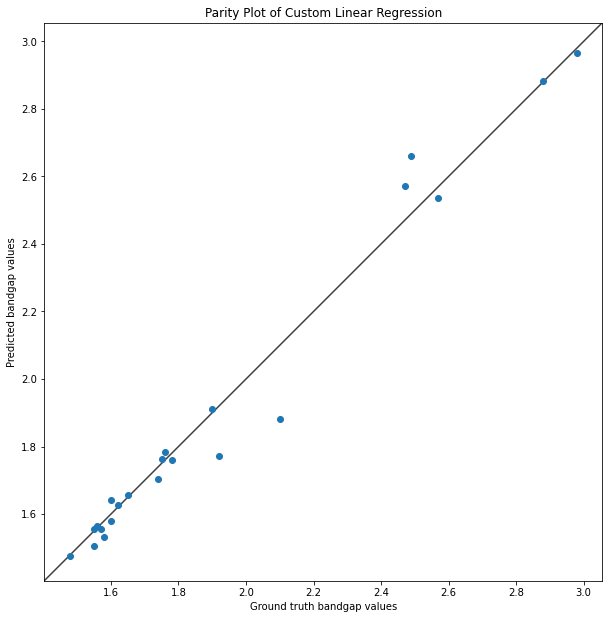

In [33]:
# Get the predictions of x_test into `y_pred`

#
# ...
#

import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,20))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 2.2 Implement Ridge regression
2.2.1 Explain Ridge regression briefly in 1-2 lines.

* Ridge Regression aka L2 regularization. It is used to avoid overfitting of the data. It uses a parameter lambda for regularization. So it is linear regression cost fucntion + lambda*[sum over square of all coeff.]

<!-- -->

2.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)
* Alpha is the Regularization strength or penalty. It encourgaes to use smaller parameters. It is used to reduces the variance of the predictions and avoid overfitting. Larger values of alpha signifies stronger regularization. For very high values it might underfit as well.
* Alpha value at 0.001 gives the minimum error on the test data. As we keep on increasing it, the test error is increasing by small margin. Due to smaller dataset size, we won't able to see much impact. 
* Ridge regression can never make any parameter zero, it can minimise some but not make it exactly zero. 

In [34]:
# you should not have imported sklearn before this point
# implement Ridge regression and make a table where you explore the effect of different values of `alpha`

from sklearn.linear_model import Ridge

alpha=[]
curr=0.001
while curr<1:
    alpha.append(curr)
    curr+=0.005

n_samples=len(x_train)
n_features = len(x_train[0])
errorForAlpha=[]

for lrate in alpha:
    rng = np.random.RandomState(0)
    clf = Ridge(alpha=lrate)
    clf.fit(rng.randn(n_samples, n_features),rng.randn(n_samples))
    output=clf.predict(x_test)
    
    sqaurError=0
    for i in range(len(output)):
        sqaurError+=(output[i]-y_test[i])**2
    sqaurError/=len(output)
    
    errorForAlpha.append(sqaurError)

print("Learning Rate\tAverage Squared Error")
for i in range(len(alpha)):
    print(round(alpha[i],3),"\t\t",errorForAlpha[i])


Learning Rate	Average Squared Error
0.001 		 3.8401919715167607
0.006 		 3.840217558562703
0.011 		 3.840243142954789
0.016 		 3.8402687246934275
0.021 		 3.840294303779029
0.026 		 3.8403198802120033
0.031 		 3.840345453992758
0.036 		 3.840371025121705
0.041 		 3.8403965935992512
0.046 		 3.840422159425805
0.051 		 3.8404477226017772
0.056 		 3.840473283127575
0.061 		 3.8404988410036083
0.066 		 3.8405243962302844
0.071 		 3.8405499488080137
0.076 		 3.8405754987372025
0.081 		 3.840601046018261
0.086 		 3.840626590651596
0.091 		 3.8406521326376164
0.096 		 3.840677671976732
0.101 		 3.840703208669349
0.106 		 3.8407287427158736
0.111 		 3.8407542741167173
0.116 		 3.8407798028722864
0.121 		 3.840805328982988
0.126 		 3.8408308524492294
0.131 		 3.8408563732714214
0.136 		 3.8408818914499663
0.141 		 3.8409074069852753
0.146 		 3.8409329198777553
0.151 		 3.840958430127813
0.156 		 3.840983937735855
0.161 		 3.8410094427022887
0.166 		 3.8410349450275216
0.171 		 3.841060444711958

### 2.3 Implement Lasso regression
2.3.1 Explain Lasso regression briefly in 1-2 lines.

* Full form of LASSO is Least Absolute Shrinkage and Selection operator. Aka. L1 regularization.
* Here the bias added is the lambda times the sum of absolute value of coefficients. It tries to solve the problem of overfitting. 

2.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.
* Parameter alpha denotes the weightage given to extra bias. It calculate the regression as linear regression + alpha *(sum of absolute value of all coefficient). 
* For alpha = 0.001 it gives the least training error. And keep on increasing for higher values by a very small margin. 
* Lasso can make the coeffient of the expression and totally remnoving some attribute for large values of alpha. L2 Can't able to achieve this. 
* Lasso tries to decrease the variance by adding a small bias. 
* In the tabel all values are more or less the same for error part. 

In [35]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn import linear_model

alpha=[]
curr=0.001
while curr<1:
    alpha.append(curr)
    curr+=0.005

n_samples=len(x_train)
n_features = len(x_train[0])
errorForAlpha=[]

for lrate in alpha:
    
    clf = linear_model.Lasso(alpha=lrate)
    clf.fit(x_train,y_train)
    output=clf.predict(x_test)
    
    sqaurError=0
    for i in range(len(output)):
        sqaurError+=(output[i]-y_test[i])**2
    sqaurError/=len(output)
    
    errorForAlpha.append(sqaurError)

print("Learning Rate\tAverage Squared Error")
for i in range(len(alpha)):
    print(round(alpha[i],3),"\t\t",errorForAlpha[i])

Learning Rate	Average Squared Error
0.001 		 0.005157560457848089
0.006 		 0.004965682475124503
0.011 		 0.006352913948151295
0.016 		 0.00933495857010835
0.021 		 0.013911817065936688
0.026 		 0.020083489435636353
0.031 		 0.02784997567920733
0.036 		 0.037211275796649596
0.041 		 0.04816738978796316
0.046 		 0.060718320649142704
0.051 		 0.0746093624302212
0.056 		 0.08471567893669432
0.061 		 0.0956496918777451
0.066 		 0.1074114012533735
0.071 		 0.12000080706357949
0.076 		 0.13341790930836314
0.081 		 0.146409555423912
0.086 		 0.1595290448740488
0.091 		 0.17334534857596345
0.096 		 0.18785846652965593
0.101 		 0.2030683987351261
0.106 		 0.20390790425059155
0.111 		 0.20390790425059155
0.116 		 0.20390790425059155
0.121 		 0.20390790425059155
0.126 		 0.20390790425059155
0.131 		 0.20390790425059155
0.136 		 0.20390790425059155
0.141 		 0.20390790425059155
0.146 		 0.20390790425059155
0.151 		 0.20390790425059155
0.156 		 0.20390790425059155
0.161 		 0.20390790425059155
0.166 	